# Advanced Optimization of the Model

In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

logger = phoebe.logger(clevel = 'WARNING')

In [ ]:
b = phoebe.open('/content/drive/MyDrive/Eclipsing-Binary-Modeling/bundles/after_fast_nm.bundle')

# Update Physics

In [ ]:
b.add_compute(compute = 'physics_comp')

<ParameterSet: 46 parameters | datasets: rv01, lc01, _default>

In [ ]:
b.set_value_all('ld_mode', value = 'interp')
b.set_value_all('atm', value = 'ck2004')
b.set_value('irrad_method', compute = 'physics_comp', value = 'horvat')
b.set_value_all('rv_method', compute = 'physics_comp', value = 'flux-weighted')
b.set_value_all('distortion_method', compute = 'physics_comp', value = 'roche')

In [ ]:
b['ntriangles@primary@physics_comp'] = 2000

### Fitting with Nelder Mead optimizer

In [ ]:
b.add_solver('optimizer.nelder_mead', solver = 'nm_solver', compute = 'physics_comp')

<ParameterSet: 14 parameters | qualifiers: compute, expose_lnprobabilities, initial_values, priors, progress_every_niters, continue_from, priors_combine, use_server, fit_parameters, fatol, comments, maxiter, adaptive, xatol>

In [ ]:
b.set_value('maxiter@nm_solver', value = 300)

In [ ]:
b.disable_dataset('rv01')

<ParameterSet: 20 parameters | components: primary, binary, secondary>

In [ ]:
b.flip_constraint('esinw', solve_for = 'ecc')
b.flip_constraint('ecosw', solve_for = 'per0')

<ConstraintParameter: {per0@binary@component} = arctan2({esinw@binary@component}, {ecosw@binary@component}) (solar units) => 60.17271171315349 deg>

In [ ]:
fit_params = ['incl@binary', 'teffratio@binary', 'requivsumfrac@binary', 'requivratio@binary', 'esinw@binary', 'ecosw@binary']
b.set_value('fit_parameters@nm_solver', fit_params)

In [ ]:
b.run_solver('nm_solver', compute = 'physics_comp', solution = 'nm_lc_sol')

100%|██████████| 300/300 [2:05:37<00:00, 25.12s/it]


<ParameterSet: 11 parameters | qualifiers: adopt_distributions, adopt_values, fitted_twigs, initial_values, fitted_values, adopt_parameters, niter, success, message, comments, fitted_units>

In [ ]:
print(b.adopt_solution('nm_lc_sol', trial_run = True))

ParameterSet: 6 parameters
      incl@binary@orbit@component: 86.96340100883192 deg
   teffratio@binary@orbit@comp...: 0.8200825899445489
   requivsumfrac@binary@orbit@...: 0.13647478050306347
   requivratio@binary@orbit@co...: 1.9159411267179856
     esinw@binary@orbit@component: -0.17007363085459898
     ecosw@binary@orbit@component: 0.02517154066803407


In [ ]:
b.adopt_solution('nm_lc_sol')

<ParameterSet: 29 parameters | contexts: component, dataset>

In [ ]:
b.run_compute(compute = 'physics_comp', solution = 'nm_lc_sol', sample_num = 1, model = 'nm_lc_model')

100%|██████████| 1/1 [00:43<00:00, 43.83s/it]


<ParameterSet: 13 parameters | kinds: rv, lc>

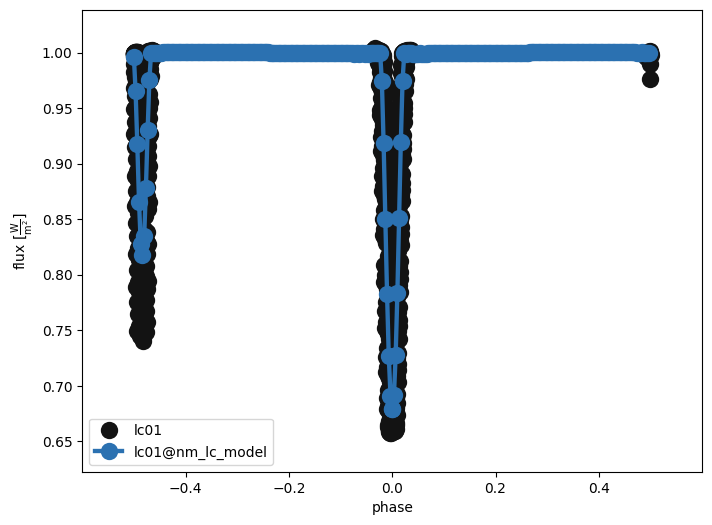

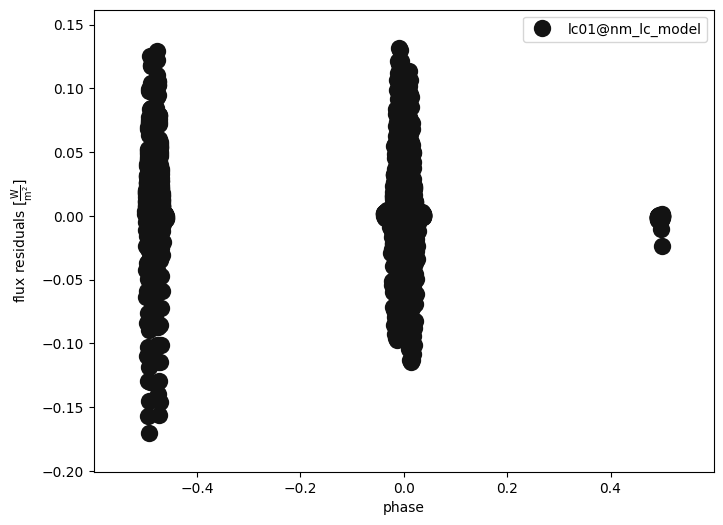

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [ ]:
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o')
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o')

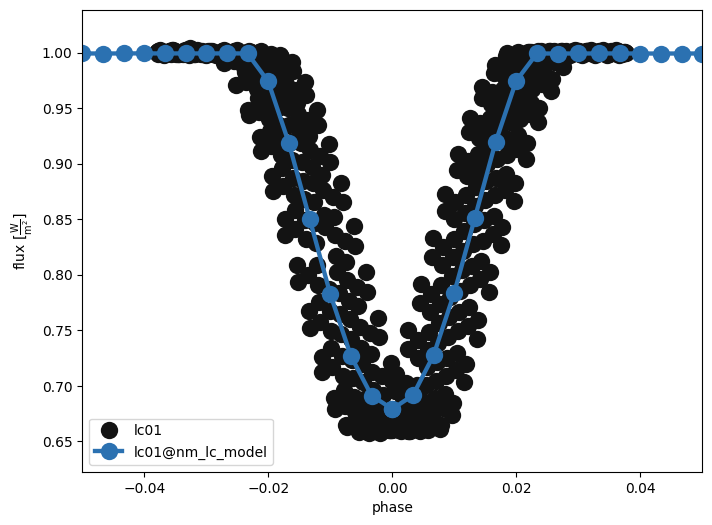

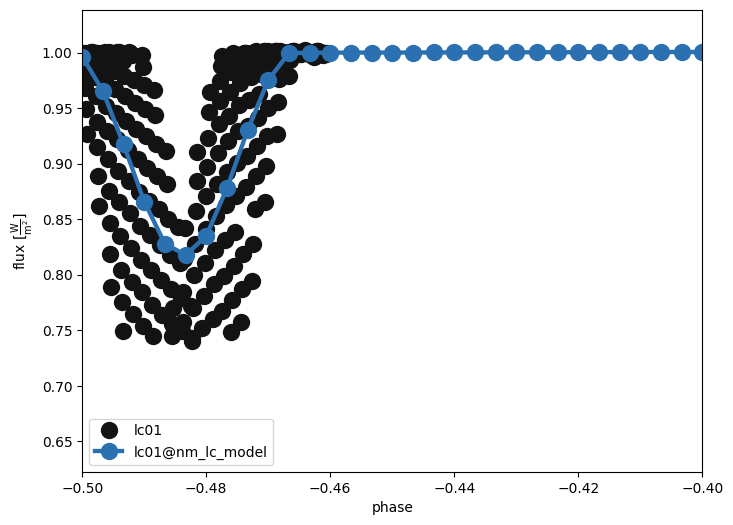

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [ ]:
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.05, 0.05))
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.5, -0.4))

In [ ]:
b.set_value('compute_phases@lc01', value = phoebe.linspace(0, 1, 1001))

In [ ]:
b.run_compute(compute = 'physics_comp', solution = 'nm_lc_sol', model = 'nm_lc_model', overwrite = True)


100%|██████████| 1/1 [02:48<00:00, 168.37s/it]


<ParameterSet: 13 parameters | kinds: lc, rv>

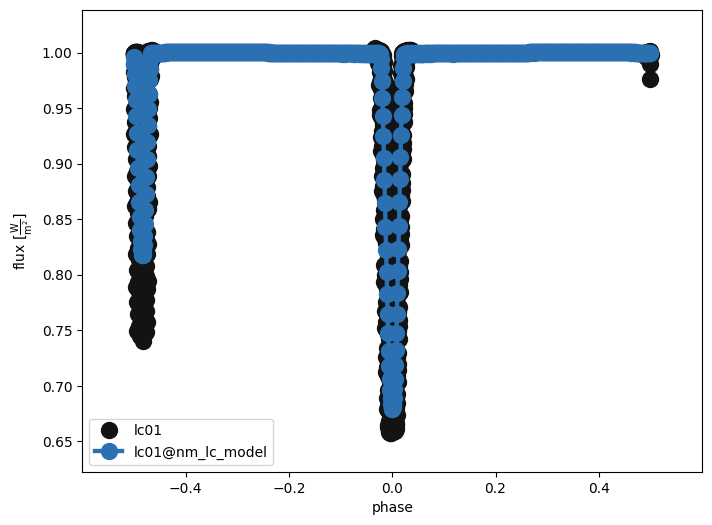

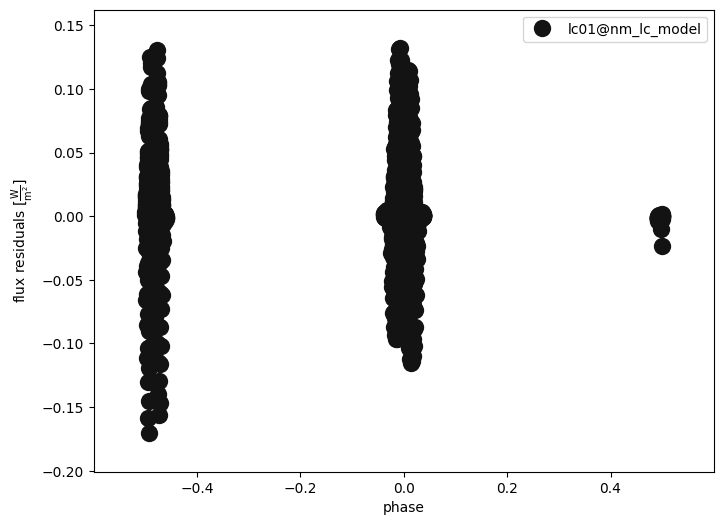

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [ ]:
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o')
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o')

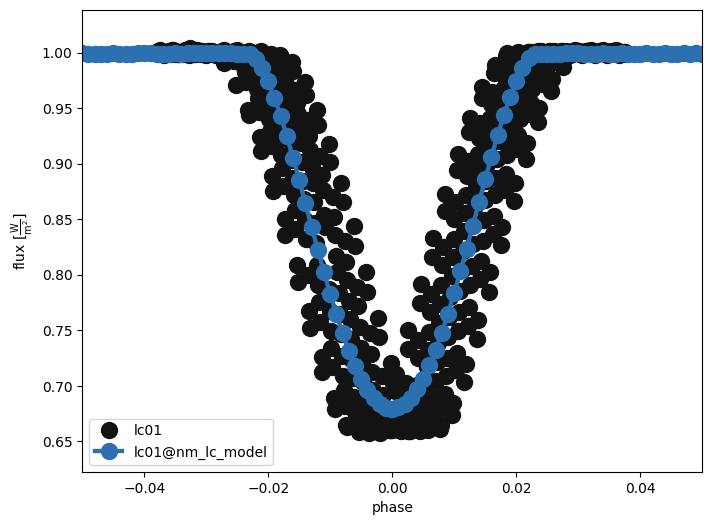

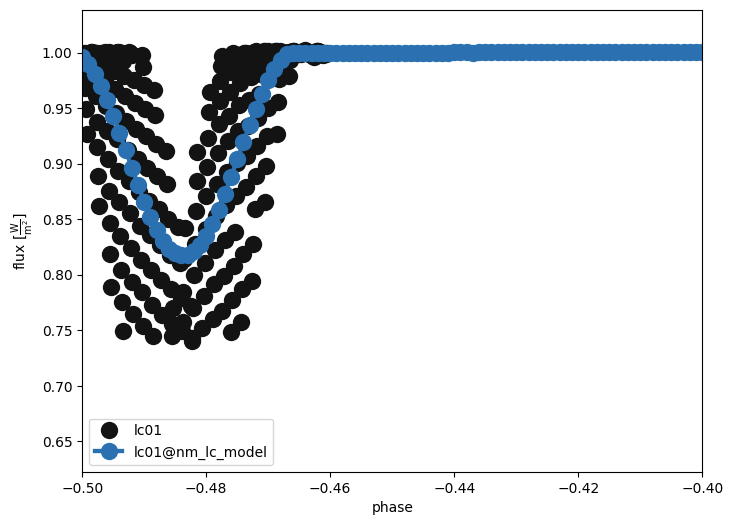

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [ ]:
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.05, 0.05))
b.plot(model = 'nm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.5, -0.4))

In [ ]:
b.save('after_nm_lc.bundle')

'after_nm_lc.bundle'

### Fitting with Differential Evolution

In [3]:
b = phoebe.open('/Users/karan/Documents/GitHub/Eclipsing-Binary-Modeling/bundles/after_nm_lc.bundle')

In [5]:
b.disable_dataset('lc01')
b.enable_dataset('rv01')

<ParameterSet: 20 parameters | components: primary, secondary, binary>

In [6]:
b.flip_constraint('ecc', solve_for = 'esinw')
b.flip_constraint('per0', solve_for = 'ecosw')

<ConstraintParameter: {ecosw@binary@component} = {ecc@binary@component} * (cos({per0@binary@component})) (solar units) => 0.025171540668033916>

In [7]:
b.add_solver('optimizer.differential_evolution', solver = 'de_solver')

<ParameterSet: 15 parameters | qualifiers: atol, tol, expose_lnprobabilities, bounds_combine, maxiter, use_server, bounds, fit_parameters, bounds_sigma, comments, recombination, popsize, polish, compute, strategy>

In [8]:
b.set_value('maxiter@de_solver', value = 100)

In [9]:
fit_params = ['vgamma@system', 'q@binary', 'asini@binary', 'ecc@binary', 'per0@binary']
b.set_value('fit_parameters@de_solver', value = fit_params)

In [10]:
b.add_distribution('vgamma@system', phoebe.uniform(0, 30), distribution='de_bounds')
b.add_distribution('q@binary', phoebe.uniform(0.5, 1.5), distribution='de_bounds')
b.add_distribution('asini@binary', phoebe.uniform(0, 30), distribution='de_bounds')
b.add_distribution('ecc@binary', phoebe.uniform(0, 0.4), distribution='de_bounds')
b.add_distribution('per0@binary', phoebe.uniform(0, 300), distribution='de_bounds')

<ParameterSet: 1 parameters>

In [11]:
b.set_value('bounds@de_solver', ['de_bounds',])

In [12]:
b.run_solver('de_solver', solution = 'de_rv_sol')

 49%|████▉     | 49/100 [09:10<09:33, 11.24s/it]


<ParameterSet: 11 parameters | qualifiers: message, success, niter, adopt_distributions, adopt_parameters, bounds, fitted_twigs, comments, adopt_values, fitted_units, fitted_values>

In [13]:
print(b.adopt_solution('de_rv_sol', trial_run = True))

ParameterSet: 5 parameters
                    vgamma@system: 15.206750166815818 km / s
         q@binary@orbit@component: 0.8835110406241994
     asini@binary@orbit@component: 26.386997239036166 solRad
       ecc@binary@orbit@component: 0.30492645895920084
      per0@binary@orbit@component: 274.3505719373418 deg


In [14]:
b.adopt_solution('de_rv_sol')

<ParameterSet: 25 parameters | contexts: dataset, system, component>

In [15]:
b.run_compute(compute = 'physics_comp', solution = 'de_rv_sol', sample_num = 1, model = 'de_rv_model')

Fri, 09 Aug 2024 22:25 BUNDLE       WARNING applying passed solution (de_rv_sol) to sample_from
Fri, 09 Aug 2024 22:25 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


<ParameterSet: 10 parameters | components: secondary, primary>

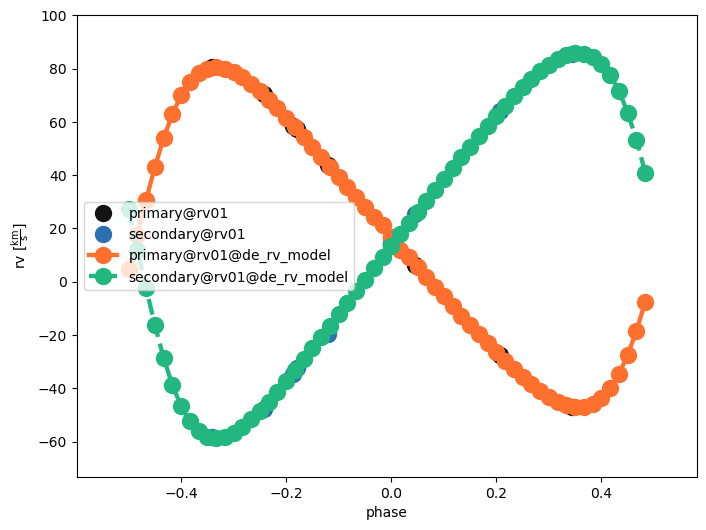

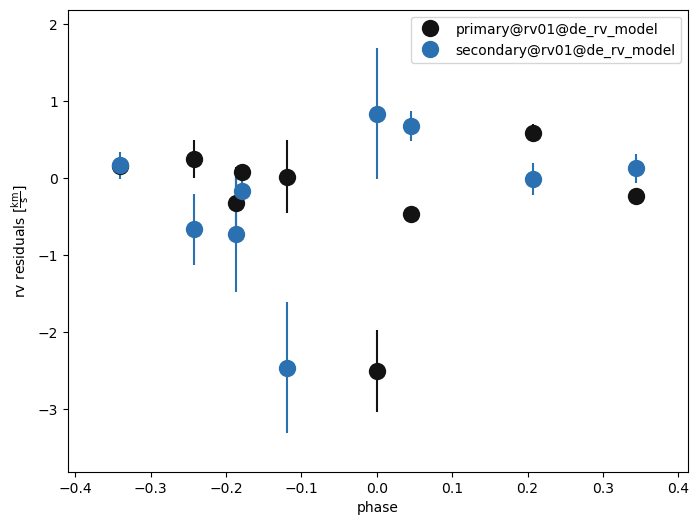

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [16]:
b.plot(model = 'de_rv_model', kind = 'rv', x = 'phases', show = True, legend = True, marker = 'o')
b.plot(model = 'de_rv_model', kind = 'rv', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o')

In [17]:
b.enable_dataset('lc01')

<ParameterSet: 18 parameters | components: primary, secondary, binary>

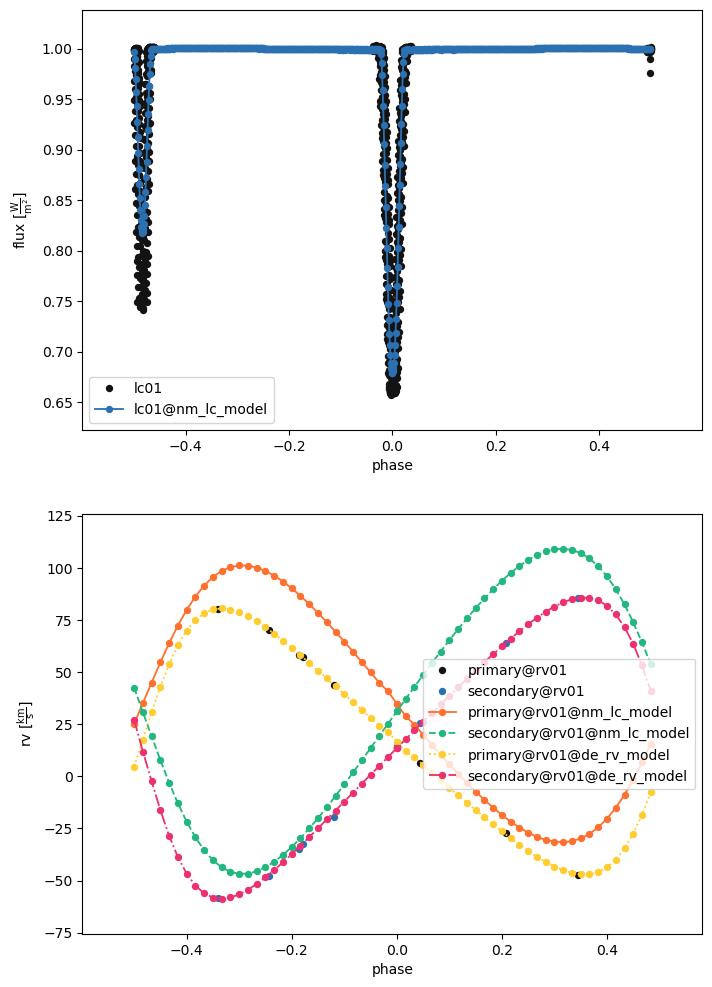

(<autofig.figure.Figure | 2 axes | 8 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [18]:
b.plot(model = ['nm_lc_model', 'de_rv_model'], x = 'phases', s = 0.006, show = True, legend = True, marker = 'o')

In [19]:
b.set_value('mask_enabled@lc01', False)

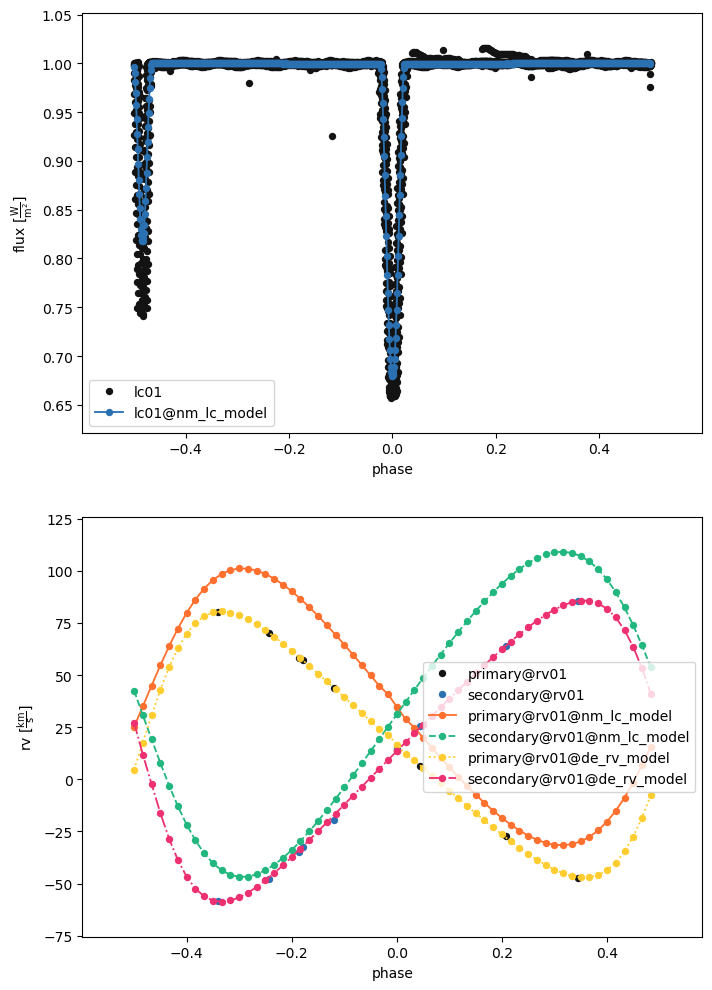

(<autofig.figure.Figure | 2 axes | 8 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [20]:
b.plot(model = ['nm_lc_model', 'de_rv_model'], x = 'phases', s = 0.006, show = True, legend = True, marker = 'o')

In [21]:
b.save('after_de_rv.bundle')

'after_de_rv.bundle'